# Model Training

### 1.1  Import Data and zRequired Packages

In [1]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings


#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('../data/BikeDekho.csv')

In [3]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
0,Hero Honda,Passion Plus,2013,30000,Upto 100 cc,petrol,ahmedabad,First,40000
1,Hero,Motocorp Passion Pro Electric Start,2015,47500,Upto 100 cc,petrol,ahmedabad,First,30000
2,Hero,Motocorp Passion Pro Electric Start With Disc ...,2015,40000,Upto 100 cc,petrol,ahmedabad,First,30000
3,Hero,HF Deluxe Alloy Self Start,2017,30000,Upto 100 cc,petrol,ahmedabad,First,20000
4,TVS,XL100 Heavy Duty i Touch Start,2018,43000,Upto 100 cc,petrol,ahmedabad,First,30000
...,...,...,...,...,...,...,...,...,...
5736,Honda,CD 110 Dream Self Start,2018,14000,100 - 125 cc,petrol,yerraguntla,First,43500
5737,Hero,HF Deluxe Spoke Self Start,2015,40000,Upto 100 cc,petrol,zirakpur,First,36000
5738,Honda,Activa 125 Deluxe,2014,11000,100 - 125 cc,petrol,zirakpur,First,35000
5739,Bajaj,Pulsar 135LS 2018 STD,2012,22000,125 - 150 cc,petrol,zirakpur,Second,25000


In [4]:
df = df.sample(frac=1)

In [5]:
df

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
3546,others,100M,2014,47100,125 - 150 cc,petrol,gandhidham,First,30000
702,TVS,Sport Kick Start Spoke,2017,11700,Upto 100 cc,petrol,delhi,First,38500
2746,Bajaj,Platina 100,2018,20000,Upto 100 cc,petrol,amroha,First,30000
4575,Yamaha,Fazer-FI Version 2.0,2009,55000,125 - 150 cc,petrol,nagpur,First,50000
1717,Hero Honda,Splendor Super,2010,15000,Upto 100 cc,petrol,jaipur,First,25000
...,...,...,...,...,...,...,...,...,...
1286,Hero,Splendor Pro Self Spoke,2017,18000,Upto 100 cc,petrol,ghaziabad,First,42000
1259,Royal Enfield,Classic 350 Redditch Edition,2018,5300,250 - 500 cc,petrol,delhi,First,145000
4373,Suzuki,Access 125 Drum,2014,31000,100 - 125 cc,petrol,malegaon,First,26000
1903,Bajaj,V15 Power Up STD,2016,9999,125 - 150 cc,petrol,kolkata,First,48000


In [6]:
df.reset_index(drop=True, inplace=True)

### Preparing X and y variables

In [7]:
X = df.drop(columns=['price', 'model'], axis=1)
y = df['price']

In [8]:
X.head()

,company,year,kms_driven,cc_type,fuel_type,place,ownership
0,others,2014,47100,125 - 150 cc,petrol,gandhidham,First
1,TVS,2017,11700,Upto 100 cc,petrol,delhi,First
2,Bajaj,2018,20000,Upto 100 cc,petrol,amroha,First
3,Yamaha,2009,55000,125 - 150 cc,petrol,nagpur,First
4,Hero Honda,2010,15000,Upto 100 cc,petrol,jaipur,First


In [9]:
y.head()

0    30000
1    38500
2    30000
3    50000
4    25000
Name: price, dtype: int64

In [10]:
num_features = [feature for feature in X.columns if X[feature].dtype!='O']
cat_features = [feature for feature in X.columns if X[feature].dtype=='O']
all_features = [feature for feature in X.columns]

In [11]:
all_features,cat_features,num_features

(['company',
  'year',
  'kms_driven',
  'cc_type',
  'fuel_type',
  'place',
  'ownership'],
 ['company', 'cc_type', 'fuel_type', 'place', 'ownership'],
 ['year', 'kms_driven'])

In [12]:
# create column Transformers  with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [13]:
preprocessor = ColumnTransformer(
    [
        ('TargetEncoder',ce.TargetEncoder(cols=['company', 'cc_type', 'place',]),['company', 'cc_type', 'place']),
        ('OneHotEncoder',OneHotEncoder(),['fuel_type','ownership']),
        ("StandardScaler",StandardScaler(),['kms_driven','year']),
    ]

)

In [14]:
preprocessor

ColumnTransformer(transformers=[('TargetEncoder',
                                 TargetEncoder(cols=['company', 'cc_type',
                                                     'place']),
                                 ['company', 'cc_type', 'place']),
                                ('OneHotEncoder', OneHotEncoder(),
                                 ['fuel_type', 'ownership']),
                                ('StandardScaler', StandardScaler(),
                                 ['kms_driven', 'year'])])

In [15]:
X=preprocessor.fit_transform(X, y)

In [16]:
X

array([[ 4.60696757e+04,  5.04970887e+04,  6.51818921e+04, ...,
         0.00000000e+00,  5.76341775e-01, -3.80059626e-01],
       [ 4.97399360e+04,  3.08029784e+04,  7.31471777e+04, ...,
         0.00000000e+00, -5.81847098e-01,  5.94592985e-01],
       [ 5.54709934e+04,  3.08029784e+04,  6.28601911e+04, ...,
         0.00000000e+00, -3.10294340e-01,  9.19477189e-01],
       ...,
       [ 5.28548091e+04,  3.72880130e+04,  6.50171910e+04, ...,
         0.00000000e+00,  4.95948583e-02, -3.80059626e-01],
       [ 5.54709934e+04,  5.04970887e+04,  5.91614645e+04, ...,
         0.00000000e+00, -6.37499055e-01,  2.69708782e-01],
       [ 4.97399360e+04,  6.85022496e+04,  7.31471777e+04, ...,
         0.00000000e+00, -5.83875564e-01,  9.19477189e-01]])

In [17]:
X.shape

(5741, 11)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4592, 11), (4592,))

### Create an Evaluation Function to giev all metrics after model Training



In [19]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    return mae, rmse, r2_square
    

In [20]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Logistic Regression":LogisticRegression(),
    "XG Boost Regressor":XGBRegressor(),
    'Cat Boost Regressor':CatBoostRegressor(),
}

In [21]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print(" - Root Mean squared error : {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_train_mae))
    print(" - R2 squared error : {:.4f}".format(model_train_r2))
    print('-------------------------------------------------------------')
    print("Model Performance for Testing set")
    print(" - Root Mean squared error : {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_test_mae))
    print(" - R2 squared error : {:.4f}".format(model_test_r2))
    print("=============================================================",end='\n\n')
    r2_list.append(model_test_r2)
    

Linear Regression
Model Performance for Training set
 - Root Mean squared error : 50926.0168
 - Mean Absolute error : 19377.7194
 - R2 squared error : 0.5431
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 97351.6508
 - Mean Absolute error : 24401.4594
 - R2 squared error : 0.4305

Lasso
Model Performance for Training set
 - Root Mean squared error : 50926.0340
 - Mean Absolute error : 19376.7085
 - R2 squared error : 0.5431
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 97351.8168
 - Mean Absolute error : 24400.9617
 - R2 squared error : 0.4305

Ridge
Model Performance for Training set
 - Root Mean squared error : 50926.5367
 - Mean Absolute error : 19372.0313
 - R2 squared error : 0.5431
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 97352.0100
 - Mean Ab

/home/kishor/Coding/Commodity/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance for Training set
 - Root Mean squared error : 63877.4649
 - Mean Absolute error : 26074.6122
 - R2 squared error : 0.2811
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 105556.9518
 - Mean Absolute error : 32494.6275
 - R2 squared error : 0.3305

XG Boost Regressor
Model Performance for Training set
 - Root Mean squared error : 9339.8667
 - Mean Absolute error : 6599.5274
 - R2 squared error : 0.9846
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 58042.7684
 - Mean Absolute error : 16383.7684
 - R2 squared error : 0.7976

Learning rate set to 0.052093
0:	learn: 73045.3554628	total: 47.7ms	remaining: 47.7s
1:	learn: 71170.5841728	total: 49.2ms	remaining: 24.6s
2:	learn: 69182.2490025	total: 50.7ms	remaining: 16.9s
3:	learn: 67297.1212650	total: 52.3ms	remaining: 13s
4:	learn: 65632.1302682	total:

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
7,Logistic Regression,0.330482
2,Ridge,0.430520
1,Lasso,0.430522
0,Linear Regression,0.430524
3,K-Neighbours Regressor,0.608590
4,Decision Tree,0.741150
6,Ada Boost Regressor,0.742047
5,Random Forest Regressor,0.742424
8,XG Boost Regressor,0.797565
9,Cat Boost Regressor,0.802495


In [23]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
7,Logistic Regression,0.330482
2,Ridge,0.430520
1,Lasso,0.430522
0,Linear Regression,0.430524
3,K-Neighbours Regressor,0.608590
4,Decision Tree,0.741150
6,Ada Boost Regressor,0.742047
5,Random Forest Regressor,0.742424
8,XG Boost Regressor,0.797565
9,Cat Boost Regressor,0.802495


In [29]:
model = CatBoostRegressor()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.052093
0:	learn: 73045.3554628	total: 9.8ms	remaining: 9.79s
1:	learn: 71170.5841728	total: 14.5ms	remaining: 7.25s
2:	learn: 69182.2490025	total: 15.5ms	remaining: 5.14s
3:	learn: 67297.1212650	total: 16.3ms	remaining: 4.05s
4:	learn: 65632.1302682	total: 17.1ms	remaining: 3.4s
5:	learn: 64115.7793188	total: 17.8ms	remaining: 2.96s
6:	learn: 62573.5264356	total: 18.6ms	remaining: 2.63s
7:	learn: 61115.8875926	total: 19.3ms	remaining: 2.4s
8:	learn: 59737.2683031	total: 20.2ms	remaining: 2.22s
9:	learn: 58269.3236945	total: 20.9ms	remaining: 2.07s
10:	learn: 56926.7111734	total: 21.6ms	remaining: 1.95s
11:	learn: 55644.2594246	total: 22.4ms	remaining: 1.84s
12:	learn: 54406.9359674	total: 24.4ms	remaining: 1.85s
13:	learn: 53209.2766105	total: 25.1ms	remaining: 1.77s
14:	learn: 52208.9594519	total: 26.4ms	remaining: 1.74s
15:	learn: 51108.2678806	total: 28.4ms	remaining: 1.75s
16:	learn: 50066.9076736	total: 29.3ms	remaining: 1.7s
17:	learn: 49099.1394459	total: 

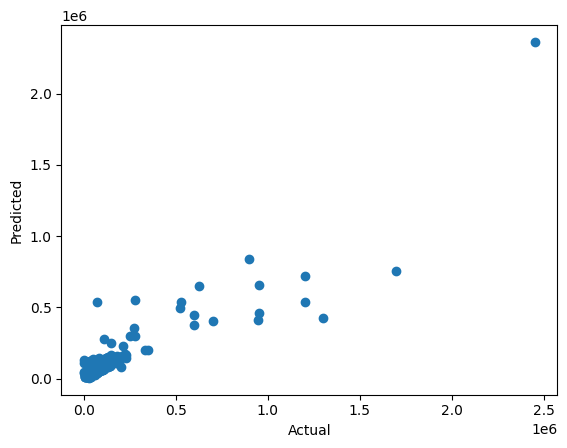

In [30]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

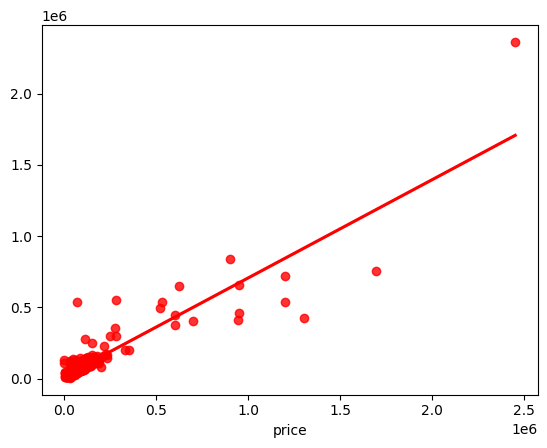

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
763,50000,52833.257431,-2833.257431
2991,70000,74418.824191,-4418.824191
4631,24000,33010.947998,-9010.947998
3509,60000,54083.410283,5916.589717
3384,100000,73313.330104,26686.669896
...,...,...,...
3875,70000,72209.293684,-2209.293684
677,70000,66394.054106,3605.945894
1295,80000,80510.573789,-510.573789
4327,60000,24235.716228,35764.283772


In [33]:
pred_df[:20]

,Actual Value,Predicted Value,Difference
763,50000,52833.257431,-2833.257431
2991,70000,74418.824191,-4418.824191
4631,24000,33010.947998,-9010.947998
3509,60000,54083.410283,5916.589717
3384,100000,73313.330104,26686.669896
1586,80000,70128.449247,9871.550753
2437,105000,115748.677217,-10748.677217
3094,80000,81366.742040,-1366.742040
199,105000,61065.309037,43934.690963
2803,110000,122151.420522,-12151.420522
